## Pattern Instance

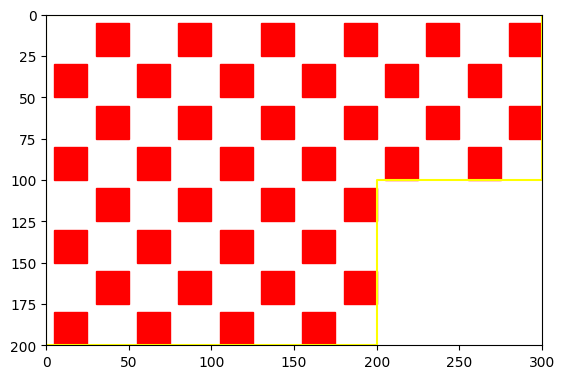

Total bricks placed: 40


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

# Define your house shape and brick parameters
house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])
brick_width = 20  # mm
brick_height = 20  # mm
gap_x = 5
gap_y = 5
pattern = [[0, 1], [1, 0]]  # Pattern matrix

def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')

    num_rows = int((y_max - y_min) // (brick_height + gap_y))
    num_cols = int((x_max - x_min) // (brick_width + gap_x))

    pattern_height = len(pattern)
    pattern_width = len(pattern[0])

    bricks = []
    for i in range(num_rows + 1):
        for j in range(num_cols + 1):
            # Check pattern to see if a brick should be placed
            if pattern[i % pattern_height][j % pattern_width] == 1:
                brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x,
                                     y_min + i * (brick_height + gap_y) + gap_y)
                brick = Polygon([
                    (brick_origin.x, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y + brick_height),
                    (brick_origin.x, brick_origin.y + brick_height)
                ])
                if house_shape.contains(brick):
                    bricks.append(brick)

    # Draw bricks
    for brick in bricks:
        ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))

    plt.gca().invert_yaxis()
    plt.show()
    print(f'Total bricks placed: {len(bricks)}')

# Example usage
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern) 


# Pattern & Percentages

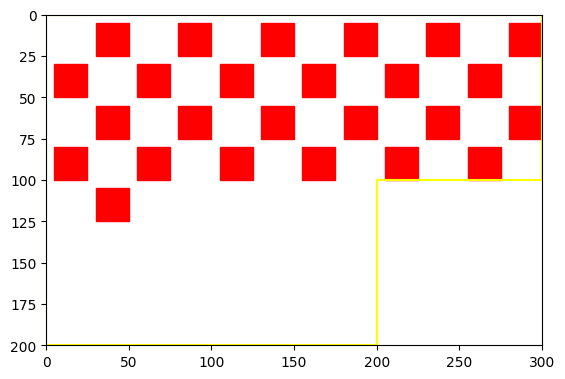

Total bricks placed: 25


In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

# Define your house shape and brick parameters
house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])
brick_width = 20  # mm
brick_height = 20  # mm
gap_x = 5
gap_y = 5
pattern = [[0, 1, 0, 1], [1, 0, 1, 0]]  # Pattern matrix

def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern, percentage):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')

    area_house = house_shape.area
    brick_area = brick_width * brick_height
    total_bricks_possible = area_house // brick_area
    bricks_to_place = int(total_bricks_possible * (percentage / 100))

    num_rows = int((y_max - y_min) // (brick_height + gap_y))
    num_cols = int((x_max - x_min) // (brick_width + gap_x))

    pattern_height = len(pattern)
    pattern_width = len(pattern[0])

    bricks = []
    bricks_placed = 0

    for i in range(num_rows + 1):
        for j in range(num_cols + 1):
            if bricks_placed >= bricks_to_place:
                break
            # Check pattern to see if a brick should be placed
            if pattern[i % pattern_height][j % pattern_width] == 1:
                brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x,
                                     y_min + i * (brick_height + gap_y) + gap_y)
                brick = Polygon([
                    (brick_origin.x, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y + brick_height),
                    (brick_origin.x, brick_origin.y + brick_height)
                ])
                if house_shape.contains(brick):
                    bricks.append(brick)
                    bricks_placed += 1

    # Draw bricks
    for brick in bricks:
        ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))

    plt.gca().invert_yaxis()
    plt.show()
    print(f'Total bricks placed: {len(bricks)}')

# Example usage
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern, 20)  # Adjust percentage as needed
